In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:

# import cv2
import tensorflow as tf

In [ ]:

import numpy as np


In [ ]:

from tensorflow.keras import layers, optimizers


In [ ]:

from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout


In [ ]:

from tensorflow.keras.models import Model, load_model


In [ ]:

from tensorflow.keras import backend as K

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
!pip install jupyterthemes
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.6 MB/s eta 0:00:00


In [ ]:
validation='/content/grive/MyDrive/proj tmrw 2/test'


In [ ]:

XRay_Directory = '/content/grive/MyDrive/proj tmrw 2/train'
import os

if not os.path.exists(XRay_Directory):
    print(f"Directory '{XRay_Directory}' does not exist.")
file_list = os.listdir(XRay_Directory)
print(f"Files in '{XRay_Directory}': {file_list}")

Files in '/content/grive/MyDrive/proj tmrw 2/train': ['3', '1', '2', '0']


In [ ]:
os.listdir(XRay_Directory)
# Use image generator to generate tensor images data and normalize them
# Use 20% of the data for cross-validation


['3', '1', '2', '0']

In [ ]:
# Perform shuffling and image resizing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator()

In [ ]:

XRay_Directory = '/content/grive/MyDrive/proj tmrw 2/train'
validation_generator = image_generator.flow_from_directory(batch_size = 40,
                                                           directory = XRay_Directory,
                                                           shuffle = True,
                                                           target_size = (256,256),
                                                           class_mode = 'categorical',
                                                           subset = "validation")

Found 0 images belonging to 4 classes.


In [ ]:
validation_generator = image_generator.flow_from_directory(
    batch_size=40,
    directory=XRay_Directory,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
)


Found 1437 images belonging to 4 classes.


In [ ]:
!pip install pillow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()

train_images, train_labels = next(train_generator)

TypeError: 'ImageDataGenerator' object is not an iterator

In [ ]:
train_generator = image_generator.flow_from_directory(
    batch_size=40,
    directory=XRay_Directory,
    shuffle=True,
    target_size=(256, 256),
    class_mode='categorical',
    subset="training" ) # Make sure this is set correctly
train_images, train_labels = next(validation_generator)


Found 1437 images belonging to 4 classes.


In [ ]:
# labels Translator
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}


In [ ]:
train_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]],

In [ ]:
train_images.shape

(40, 256, 256, 3)

In [ ]:
train_labels.shape

(40, 4)

In [ ]:

# Create a grid of 16 images along with their corresponding labels
train_images = train_images / 255.0
for i in np.arange(0, L*W):
         axes[i].imshow(train_images[i], extent=[0, 256, 256, 0])

label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}
import numpy as np
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i], extent=[0, 256, 256, 0], cmap='bone')
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [ ]:
!pip install keras-applications
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input
basemodel=ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape=(256,256,3)))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 820.7 kB/s eta 0:00:00
94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from tensorflow.keras import layers
for layer in basemodel.layers[:-10]:

  layers.trainable = False

In [ ]:
!pip install tensorflow

from tensorflow.keras.models import Model
headmodel=basemodel.output
headmodel=AveragePooling2D(pool_size=(4,4))(headmodel)
headmodel=Flatten(name='flatten')(headmodel)
headmodel=Dense(256,activation='relu')(headmodel)
headmodel=Dropout(0.3)(headmodel)
headmodel=Dense(128,activation='relu')(headmodel)
headmodel=Dropout(0.2)(headmodel)
headmodel=Dense(4,activation='softmax')(headmodel)
model = Model(inputs = basemodel.input, outputs = headmodel)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:

!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=["accuracy"],
)

In [ ]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
validation='/content/grive/MyDrive/proj tmrw 2/test'
train_generator = image_generator.flow_from_directory(batch_size = 4, directory= XRay_Directory, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="training")
val_generator = image_generator.flow_from_directory(batch_size = 4, directory= validation, shuffle= True, target_size=(256,256), class_mode= 'categorical', subset="validation")

Found 1437 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 1, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

359/359 [==============================] - ETA: 0s - loss: 0.3809 - accuracy: 0.8953

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import model_from_json

json_file = open('/content/grive/MyDrive/proj tmrw 2/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights('/content/grive/MyDrive/proj tmrw 2/chestdisease_trained_model.h5')
print("Loaded model from disk")



Loaded model from disk


In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [ ]:
# Let's compile the model
!pip install tensorflow
import tensorflow as tf
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
test_directory = '/content/grive/MyDrive/proj tmrw 2/test'

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_directory(batch_size = 40, directory= test_directory, shuffle= True, target_size=(256,256), class_mode= 'categorical')

evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

Found 38 images belonging to 4 classes.


<ipython-input-49-ccb2e4c5f0df>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  evaluate = model.evaluate_generator(test_generator, steps = test_generator.n // 4, verbose =1)


1/9 [==>...........................] - ETA: 1:48 - loss: 2.3934 - accuracy: 0.8158

9/9 [==============================] - 14s 17ms/step - loss: 2.3934 - accuracy: 0.8158
Accuracy Test : 0.8157894611358643


In [ ]:
!pip install opencv-python

In [ ]:
!pip install opencv-python
!pip install tensorflow
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
  for item in os.listdir(os.path.join(test_directory,str(i))):
    img= cv2.imread(os.path.join(test_directory,str(i),item))
    img = cv2.resize(img,(256,256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1,256,256,3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 241ms/step


In [ ]:
len(original)

38

In [ ]:
score = accuracy_score(original,prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.7894736842105263


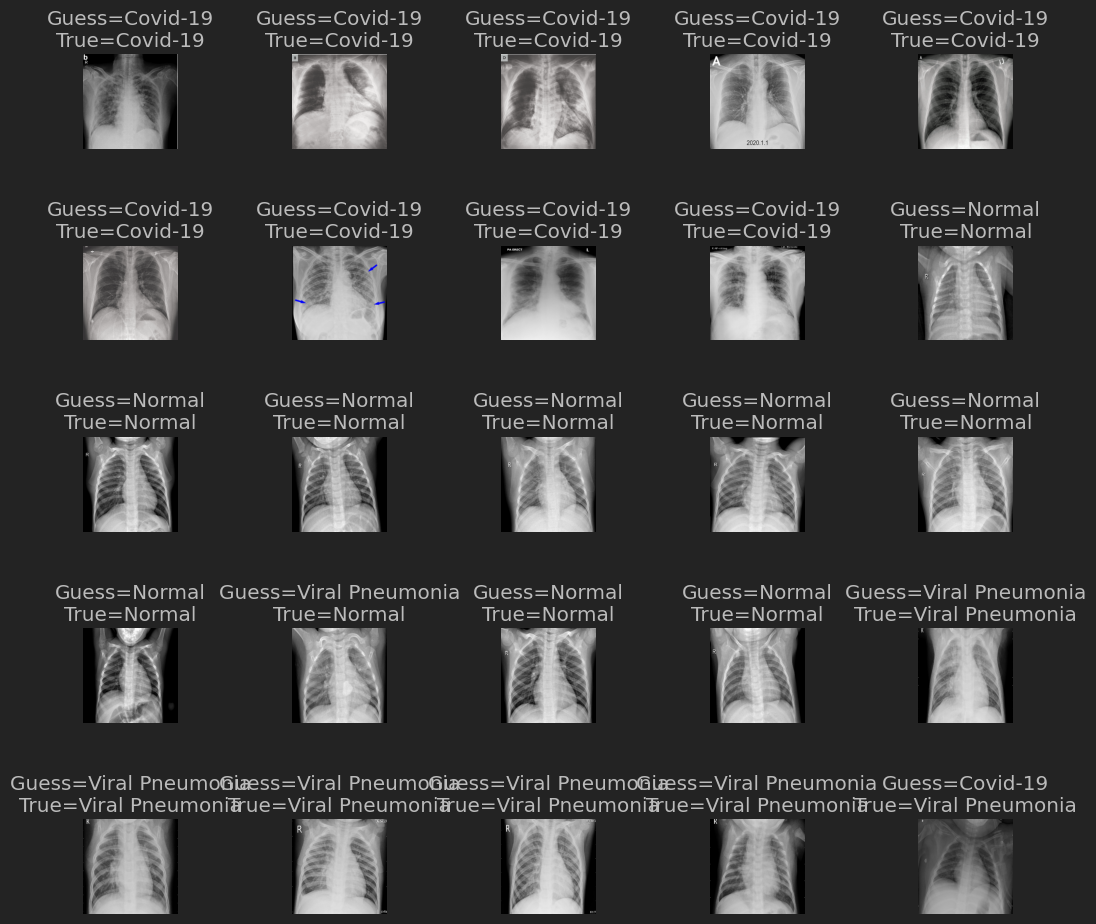

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
label_names = {0 : 'Covid-19', 1 : 'Normal' , 2: 'Viral Pneumonia', 3 : 'Bacterial Pneumonia'}

L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2)

In [ ]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.82      0.90      0.86        10
           2       0.67      0.60      0.63        10
           3       0.86      0.67      0.75         9

    accuracy                           0.79        38
   macro avg       0.79      0.79      0.78        38
weighted avg       0.79      0.79      0.78        38



Text(0.5, 1.0, 'Confusion_matrix')

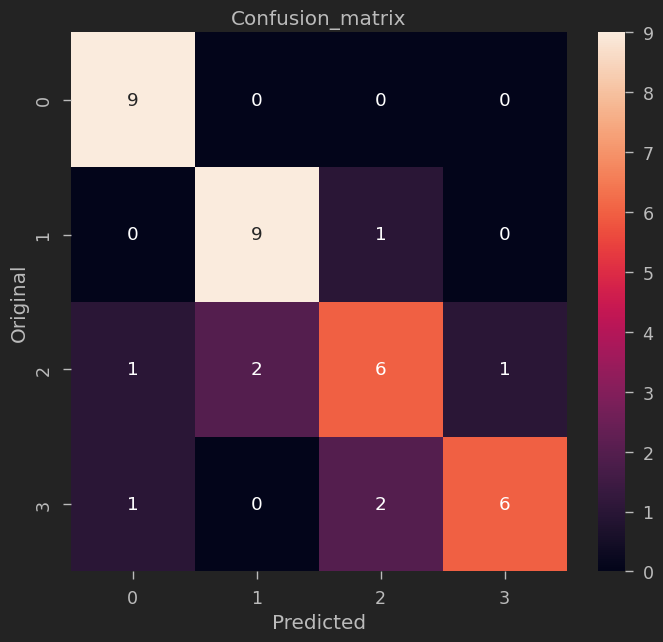

In [ ]:
import seaborn as sns
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')